# Mini-lab 8: Uncertainty in predictions.

As in mini-lab 7/8 we will continue to explore transportation mode choice, but now we will consider uncertainty in predcitions. We will use a technique called **bootstrapping** to make inferences on the expected travel mode distribution. First we will apply bootstrapping to construct **confidence intervals** for the proportion of people who choose one mode of transportation for various sample sizes. Next we will revisit k-nearest neighbors and will consider uncertainty in travel mode predictions.


### The dataset
The dataset is the same as we used in Mini-labs 6 and 7. It contains the actual travel decisions for travelers given various travel alternatives. Below is the detailed dataset description.
#### "The California Department of Transportation (Caltrans) conducts the California Household Travel Survey (CHTS) every ten years to obtain detailed information about the socioeconomic characteristics and travel behavior of households statewide." -[Caltrans website](http://www.dot.ca.gov/hq/tpp/offices/omsp/statewide_travel_analysis/chts.html)


The modechoice.csv file contains data from the CHTS on trips that people living in the bay area actually took. The dataset contains demographic info on the traveler as well as trip origin taz and destination taz. We have combined this data with the inter TAZ travel time/cost data that we used in mini-labs 4 and 5 to provide information on trip cost, time, and distance for all available travel modes.

Note that for some trips/some people, not all modes are available. Some people do not have a drivers license or do not have access to a car. Sometimes biking is infeasible due to bike ownership, trip distance or restrictions on biking across bridges. 

The data in modechoice.csv is as follows:
<table>
    <tr>
        <td>'observation_id'</td>   <td>int id</td>
    </tr><tr>
        <td>'choice'        </td>   <td>  string mode chosen <li>'drive_alone' - drive alone,<li>'shared_ride_2' - 2 person shared ride,<li>'shared_ride_3' - 3 person shared ride,<li>'walk_transit_walk' - walk tranit walk,<li>'drive_transit_walk' - drive transit walk,<li>'walk_transit_drive' - walk transit drive,<li>'walk' - walk,<li>'bike' - bike </td>
    </tr><tr>
    <td> 'availability_drive_alone'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_shared_ride_2'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_shared_ride_3+'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_walk_transit_walk'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_drive_transit_walk'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_walk_transit_drive'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_walk'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_bicycle'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'household_id'</td>   <td>      int
    </tr><tr>
    <td> 'person_id'</td>   <td>              int
    </tr><tr>
    <td> 'tour_id'</td>   <td>                 int
    </tr><tr>
    <td> 'tour_origin_taz'</td>   <td>                   int taz id
    </tr><tr>
    <td> 'primary_dest_taz'</td>   <td>    int taz id
    </tr><tr>
    <td> 'age'</td>   <td>          int age in years
    </tr><tr>
    <td> 'household_size'</td>   <td>                       int, number of people
    </tr><tr>
    <td> 'household_income'</td>   <td>    int 1-8, 1 = lowest income bracket, 8=highest
    </tr><tr>
    <td> 'household_income_values'</td>   <td>         int dollar value household income
    </tr><tr>
    <td> 'transit_subsidy'</td>   <td>   1 if has subsidy, else 0
    </tr><tr>
    <td> 'transit_subsidy_amount'</td>   <td>           subsidy dollar amount
    </tr><tr>
    <td> 'cross_bay'</td>   <td>    1 if trip crosses bay, else 0
    </tr><tr>
    <td> 'total_travel_time_drive_alone'</td>   <td>    door to door travel time in minutes
    </tr><tr>
    <td> 'total_travel_time_shared_ride_2'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_time_shared_ride_3+'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_time_walk_transit_walk'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_time_drive_transit_walk'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_time_walk_transit_drive'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_time_walk'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_time_bicycle'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_distance_drive_alone' </td>   <td> travel distance in miles
    </tr><tr>
    <td> 'total_travel_distance_shared_ride_2'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_distance_shared_ride_3+'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_distance_walk'     </td>   <td> 
    </tr><tr>
    <td> 'total_travel_distance_bicycle'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_cost_drive_alone'</td>   <td> travel cost in dollars
    </tr><tr>
    <td> 'total_travel_cost_shared_ride_2'</td>   <td> Note driving costs include fixed per mile rate divided evenly among passengers, and tolls. Does not include parking and other car ownership related costs
    </tr><tr>
    <td> 'total_travel_cost_shared_ride_3+'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_cost_walk_transit_walk'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_cost_drive_transit_walk'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_cost_walk_transit_drive'</td>   <td> 
    </tr><tr>
    <td> 'age_ctgry'         <td>  str age category:
                                       <li>'0-04' = 0-4 years old,
                                       <li>'05-19' = 5-19 years old, 
                                       <li>'20-44' = 20-44 years old, 
                                       <li>'45-64' = 45-64 years old, 
                                       <li>'65+' = 65+ years old, 




In [5]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mc = Table.read_table('../minilab6/modechoice.csv')
mc

observation_id,choice,availability_drive_alone,availability_shared_ride_2,availability_shared_ride_3+,availability_walk_transit_walk,availability_drive_transit_walk,availability_walk_transit_drive,availability_walk,availability_bicycle,household_id,person_id,tour_id,tour_origin_taz,primary_dest_taz,age,household_size,household_income,household_income_values,transit_subsidy,transit_subsidy_amount,cross_bay,total_travel_time_drive_alone,total_travel_time_shared_ride_2,total_travel_time_shared_ride_3+,total_travel_time_walk_transit_walk,total_travel_time_drive_transit_walk,total_travel_time_walk_transit_drive,total_travel_time_walk,total_travel_time_bicycle,total_travel_distance_drive_alone,total_travel_distance_shared_ride_2,total_travel_distance_shared_ride_3+,total_travel_distance_walk,total_travel_distance_bicycle,total_travel_cost_drive_alone,total_travel_cost_shared_ride_2,total_travel_cost_shared_ride_3+,total_travel_cost_walk_transit_walk,total_travel_cost_drive_transit_walk,total_travel_cost_walk_transit_drive,age_ctgry
1,drive_alone,1,1,1,1,1,1,1,1,1043613,1,0,1004,969,53,2,6,87500,0,-1,0,20.97,20.97,20.97,83.56,63.05,67.29,167.6,41.9,9.1,9.1,9.1,8.38,8.38,1.6817,0.9609,0.6726,5.84,3.22,3.02,45-64
2,drive_alone,1,1,1,1,1,1,1,1,1043613,1,1,1004,969,53,2,6,87500,0,-1,0,22.16,22.16,22.16,87.38,77.79,58.01,167.6,41.9,9.1,9.1,9.1,8.38,8.38,1.6817,0.9609,0.6726,4.83,3.22,3.22,45-64
3,shared_ride_2,1,1,1,1,1,1,0,0,1045607,1,0,908,116,57,1,4,42500,0,-1,1,47.98,47.98,47.98,140.63,131.49,137.39,nan,nan,31.94,31.94,31.94,nan,nan,9.1125,5.2071,3.645,6.95,7.75,5.98,45-64
4,bike,0,1,1,1,0,1,1,1,1049908,1,0,30,12,50,1,2,17500,0,-1,0,nan,15.05,15.05,26.46,nan,16.77,42.8,10.7,nan,2.23,2.23,2.14,2.14,nan,0.2355,0.1649,3.22,nan,3.22,45-64
5,walk,0,1,1,1,0,1,1,1,1049908,1,1,30,9,50,1,2,17500,0,-1,0,nan,11.72,11.72,43.86,nan,28.89,19.2,4.8,nan,0.96,0.96,0.96,0.96,nan,0.1014,0.071,3.22,nan,3.22,45-64
6,shared_ride_2,1,1,1,1,1,1,1,1,1051388,2,0,89,4,48,3,7,125000,0,-1,0,26.32,26.32,26.32,42.1,55.48,58.48,143.2,35.8,7.4,7.4,7.4,7.16,7.16,1.3675,0.7815,0.547,3.22,3.98,3.22,45-64
7,drive_alone,1,1,1,1,1,1,1,1,1051388,2,1,89,23,48,3,7,125000,0,-1,0,32.07,32.07,32.07,86.89,91.7,83.35,184.8,46.2,9.47,9.47,9.47,9.24,9.24,1.7501,1,0.7,3.22,3.22,3.22,45-64
8,shared_ride_3,1,1,1,1,1,1,1,1,1051388,3,0,89,71,10,3,7,125000,0,-1,0,16.58,16.58,16.58,53.32,46.76,46.77,94,23.5,4.7,4.7,4.7,4.7,4.7,0.8686,0.4964,0.3474,3.22,3.22,3.22,05-19
9,walk_transit_walk,1,1,1,1,1,1,1,0,1069723,1,0,86,12,50,2,5,62500,0,-1,0,21.93,21.93,21.93,54.13,42.72,44.78,95.6,nan,4.87,4.87,4.87,4.78,nan,0.9,0.5143,0.36,3.22,3.22,3.22,45-64
10,walk,1,1,1,1,1,1,1,1,1093539,1,0,90,111,56,3,8,175000,1,999998,0,33.13,33.13,33.13,100.65,100.39,100.39,192.4,48.1,9.86,9.86,9.86,9.62,9.62,1.8222,1.0412,0.7288,3.22,3.22,3.22,45-64


# Bootstrapping, Confidence Intervals, and Uncertainty in estimation
If the travel survey data in the mc table is a representative sample of trips in the bay area, then we can use the data to make inferences about how other samples from the same population will behave. In the next section we will estimate the proportion of trips to be taken by bike

### Point estimate for the observed proportion.
If we choose a sample of 50 trips, what proportion of trips would we expect are taken on bike? Without any other information, the observed proportion from the total sample is a good guess for the expected proportions of trips taken on bike. In the cell below, compute the proportion of trips taken on bike in the mc table

In [3]:
#Your code here:
#Answer key:
total_samples = mc.num_rows
num_bike_samples = mc.where('choice','bike').num_rows

percent_bike = num_bike_samples/total_samples
percent_bike

0.08571428571428572

### Bootstrapping:
Bootstrapping is a technique where we take a random sample with replacement from the observed data as a means to estimate various statistics on the sample. We can use bootstrapping to estimate a sample mean, sample variance, sample proportions, and to construct confidence intervals. Below is some code where we use bootstrapping to simulate the proportion of samples with a given value. Specifically we will estimate the expected proportion of trips taken on bike from a sample of bike trips.

In [6]:
"""Empirical distribution of proportion of samples with a given value"""

def simulate_sample_proportion(table, label, value, sample_size, repetitions):

    bootstrap_estimates = make_array()

    for i in range(repetitions):
        new_sample = table.sample(sample_size)
        new_sample_proportion = new_sample.where(label,value).num_rows/sample_size
        bootstrap_estimates = np.append(bootstrap_estimates, new_sample_proportion)

    sample_proportions = Table().with_column('Sample Proportions', bootstrap_estimates)
    left_end = percentile(2.5, bootstrap_estimates)
    right_end = percentile(97.5, bootstrap_estimates)


    # Display empirical histogram and print all relevant quantities
    sample_proportions.hist(bins=np.arange(0,np.ceil(max(bootstrap_estimates)*2)/2,max(.02,1/sample_size)))
    plt.xlabel('Sample Proportions')
    plt.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population proportion:", table.where(label,value).num_rows/table.num_rows)
    print("Average of proportions: ", np.mean(bootstrap_estimates))
    print("SD of sample proportions:", np.std(bootstrap_estimates))
    print ('95 percent CI for proportion of samples where %s == %s is (%.2f, %.2f)'%(label, value, left_end, right_end))



Sample size:  50
Population proportion: 0.08571428571428572
Average of proportions:  0.0861
SD of sample proportions: 0.0393851494856
95 percent CI for proportion of samples where choice == bike is (0.02, 0.18)


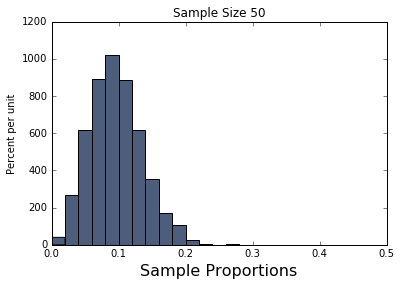

In [11]:
simulate_sample_proportion(mc, 'choice', 'bike', sample_size=50, repetitions=1000)

The cell above simulates 1000 repitions of a 50 draw sample size. Copy and paste the above cell to simulate a sample size of 20, 100, and 300. Answer the following questions:


### Questions
* Describe how the shape of the histogram changes as the sample size increases.
* What are the upper and lower bounds of the 95 percent confidence interval for the proportion of trips take on bike for sample size = 20, 50, 100, 300?
* What is the average of the sample proportion for sample size = 20, 50, 100, 300? how does this compare to the poin estimate you found above?
* What is the standard deviation of the sample proportion for sample size = 20, 50, 100, 300? Does the standard deviation increase of decrease as the sample size increases?

Sample size:  20
Population proportion: 0.08571428571428572
Average of proportions:  0.0858
SD of sample proportions: 0.0623166109476
95 percent CI for proportion of samples where choice == bike is (0.00, 0.20)
Sample size:  50
Population proportion: 0.08571428571428572
Average of proportions:  0.08738
SD of sample proportions: 0.0408158743628
95 percent CI for proportion of samples where choice == bike is (0.02, 0.18)
Sample size:  100
Population proportion: 0.08571428571428572
Average of proportions:  0.08546
SD of sample proportions: 0.0280176444406
95 percent CI for proportion of samples where choice == bike is (0.04, 0.14)
Sample size:  300
Population proportion: 0.08571428571428572
Average of proportions:  0.0854833333333
SD of sample proportions: 0.0161757620463
95 percent CI for proportion of samples where choice == bike is (0.06, 0.12)


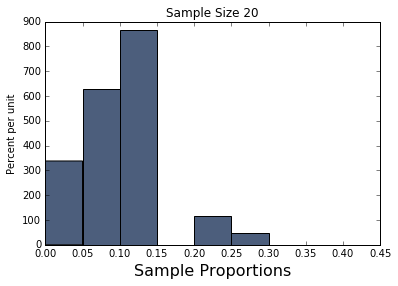

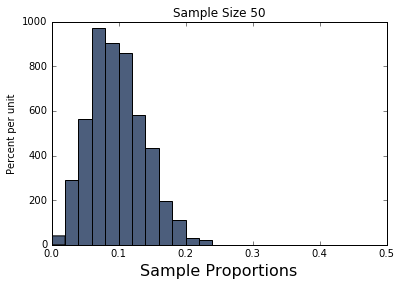

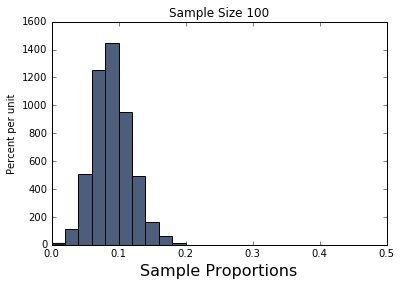

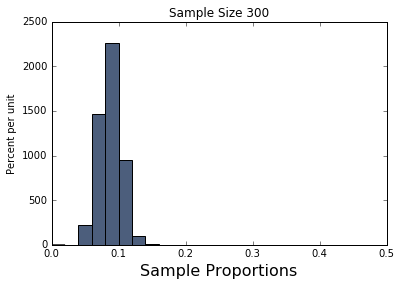

In [13]:
#Answer key:
simulate_sample_proportion(mc, 'choice', 'bike', 20, 1000)
simulate_sample_proportion(mc, 'choice', 'bike', 50, 1000)
simulate_sample_proportion(mc, 'choice', 'bike', 100, 1000)
simulate_sample_proportion(mc, 'choice', 'bike', 300, 1000)

In [ ]:
# Your answers here



# Uncertainty in predictions
## Drive vs. transit travel time comparison

As in mini-lab 7 we will use kNN to predict the travel mode, but now we will look at uncertainty in our predictions. First we take trips where both drive and transit are available, we compute the delta_travel_time and delta_travel_cost for trips where choice = transit and where choice = drive. 

In [15]:
# Get rows where both drive and walk to transit are available
transit_drive_avail = mc.where('availability_drive_alone',1).where('availability_walk_transit_walk',1)

# From transit_drive_avail, store the rows where the mode 'choice' is 'walk_transit_walk'
# in a table called took_transit
took_transit = transit_drive_avail.where('choice','walk_transit_walk')

# from transit_drive_avail, store the rows where the selected mode 'choice' is 'drive_alone'
drove = transit_drive_avail.where('choice','drive_alone')


# Compute the difference in travel time (the 'total_travel_time_walk_transit_walk' column-
# the 'total_travel_time_drive_alone' column) for people who took transit.
chose_wtw_tt_delta = (took_transit.column('total_travel_time_walk_transit_walk')-
                      took_transit.column('total_travel_time_drive_alone'))

# Compute the difference in travel time (the 'total_travel_time_walk_transit_walk' column-
# the 'total_travel_time_drive_alone' column) for people who drove.
chose_drive_tt_delta = (drove.column('total_travel_time_walk_transit_walk')-
                        drove.column('total_travel_time_drive_alone'))

# Compute the cost delta for transit cost vs. drive alone cost for people who took tranist
chose_wtw_cost_delta = (took_transit.column('total_travel_cost_walk_transit_walk')
                        -took_transit.column('total_travel_cost_drive_alone'))

# Compute the cost delta for transit cost vs. drive alone cost for people who drove
chose_drive_cost_delta = (drove.column('total_travel_cost_walk_transit_walk')
                          -drove.column('total_travel_cost_drive_alone'))

## Build the input data table
As we did in mini-lab 7, we must first build the input table table that contains the response variable (the thing we want to predict - in this case, whether someone will drive or not), and the inputs that will be used to predict the response variable (in this case delta_travel_time and delta_travel_cost). For this min-lab I used the normalized travel cost and travel time.

In [16]:
input_table = Table().with_columns('transit_time-drive_time', chose_drive_tt_delta,
                                   'transit_cost-drive_cost', chose_drive_cost_delta,
                                   'choice=drive',1)

transit_input_table = Table().with_columns('transit_time-drive_time', chose_wtw_tt_delta,
                                           'transit_cost-drive_cost', chose_wtw_cost_delta,
                                           'choice=drive',0)
input_table.append(transit_input_table)

def norm(data):
    x_minus_mean = data - np.mean(data)
    x_norm = x_minus_mean/np.std(data)
    return x_norm

def transform(to_predict, data):
    return (to_predict - np.mean(data))/np.std(data)


input_table['normed_transit_time-drive_time'] = norm(input_table['transit_time-drive_time'])
input_table['normed_transit_cost-drive_cost'] = norm(input_table['transit_cost-drive_cost'])

input_table

transit_time-drive_time,transit_cost-drive_cost,choice=drive,normed_transit_time-drive_time,normed_transit_cost-drive_cost
62.59,4.1583,1,0.23162,1.73266
65.22,3.1483,1,0.327507,1.03031
54.82,1.4699,1,-0.0516645,-0.136824
26.79,2.3866,1,-1.0736,0.500638
41.49,2.5436,1,-0.53766,0.609813
57.78,2.004,1,0.0562536,0.234582
94.82,0.1838,1,1.40669,-1.03116
13.38,2.8282,1,-1.56252,0.807721
68.36,2.394,1,0.441988,0.505783
32.56,2.2979,1,-0.863237,0.438957


## The kNN class
This is the same as mini-lab 7.

In [17]:
def distance(x, y):
    return np.sqrt(np.sum((x-y)**2,1))

class KNearestNeighbors():
    def __init__ (self, n_neighbors=5):
        '''
        n_neighbors: number of neighbors
        '''
        self.n_neighbors = n_neighbors
    
    def fit(self, input_data, response):
        '''
        input_data: a table, the values of this table will be used to 
            compute the distance to the neighbors
        response: a table with one column, the values in this column 
            represent the category of the thing we are trying to predict 
        '''
        self.input_data = input_data.values
        self.response = response.values.flatten()
    
    def predict(self, to_predict, return_kneighbor_inds=True):
        '''
        to_predict: A single input data point. It should contain one value 
           for each of the columns in the input_data table.
        return_kneighbor_inds: boolean. If True, return the indices of the
            nearest neighbors from the input table, otherwise, only the 
            majority category of the k-nearest neighbors is returned.
        '''
         #get distance input_data to predict"
        dists = distance(to_predict, self.input_data)

        #get indices of k nearest points
        inds = np.argsort(dists)[0:self.n_neighbors]

        #return the most common response among the neighbors
        most_common_response = (np.argmax(np.bincount(self.response[inds])))
        if return_kneighbor_inds:
            return most_common_response, inds
        return most_common_response
            

## Using the classifier
As a reminder, this is how we use the classifier

In [18]:
# Use the input_table.select() method to select the columns to be used to determine 
# the nearest neighbors
input_data = input_table.select(['normed_transit_time-drive_time','normed_transit_cost-drive_cost'])

# Use the input_table.select() method to select the column with the response variable
response = input_table.select(['choice=drive'])

# Create an instance of the KNearestNeighbors class, let's set n_neighbors to 5.
kNN = KNearestNeighbors(5)

# Load in the nearest neighbor candidates using the fit method:
kNN.fit(input_data, response)

# Set to_predict =[25,1.5] This means we are predicting the travel mode of a trip with 
# delta_travel_time = 25 min, delta_travel_cost = 1.5
to_predict = [25,1.5]

#transform the first element of this point to find out how many standard deviations 
#the delta_travel_time is from the mean. Do the same for delta_travel_cost
normed_to_predict = [transform(to_predict[0],input_table['transit_time-drive_time']),
                     transform(to_predict[1],input_table['transit_cost-drive_cost'])]


prediction, nn_inds = kNN.predict(normed_to_predict, True)
predicted_travel_mode = 'drive' if prediction ==1 else 'take transit'

print ('Based on the k nearest neighbors, the predicted travel mode is %s' %predicted_travel_mode)

Based on the k nearest neighbors, the predicted travel mode is take transit


### Visualizing uncertainty in predictions
In the cell below, we sample 100 data points from the table and find the predicted travel mode over the input-space. We do this 100 times and color the points based on how many times we predict the travel mode is drive and how many times the travel mode is transit. If the travel mode is always drive the mode is bright blue, if the mode is always transit it will be red. Otherwise it will be somewhere in between.

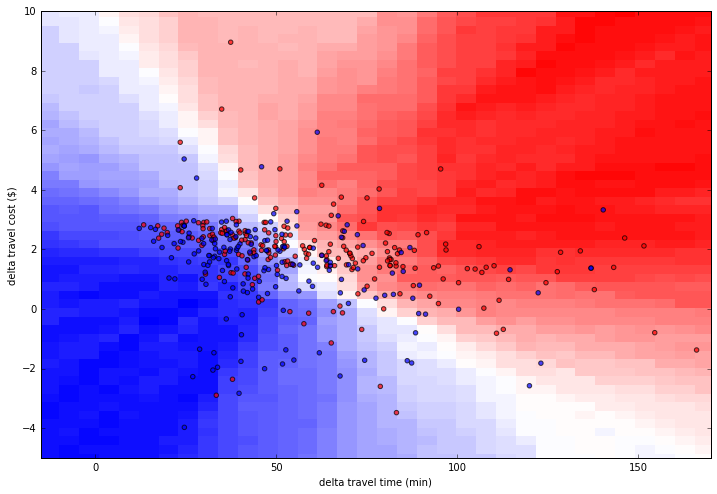

In [20]:
from matplotlib.colors import ListedColormap

kNN = KNearestNeighbors(n_neighbors=10)

Zs = []

h=.2
X = input_table.select([3,4]).values
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

def untransform(x, data):
    return x*np.std(data)+np.mean(data)
for i in range(100):
    sampled_data = input_table.sample(20)
    input_data = sampled_data.select(['normed_transit_time-drive_time','normed_transit_cost-drive_cost'])
    response = sampled_data.select(['choice=drive'])
    kNN.fit(input_data, response)

    Z= []
    for i in range(len(xx.ravel())):
        Z.append(kNN.predict(np.c_[xx.ravel()[i], yy.ravel()[i]],False))


    Z = np.array(Z).reshape(xx.shape)
    Zs.append(Z)


cmap=plt.get_cmap('bwr')
plt.figure(figsize=(12,8))   
plt.pcolormesh(untransform(xx,input_table.select([0]).values), untransform(yy, input_table.select([1]).values), 
               np.sum(np.array(Zs),0), cmap=cmap)

cmap_bold = ListedColormap(['#0000FF','#FF0000']) 

plt.scatter(untransform(X[:,0],input_table.select([0]).values), 
            untransform(X[:,1],input_table.select([1]).values), 
            c=input_table['choice=drive'], facecolors='none',
            cmap=cmap_bold,
            alpha = 0.7)

plt.xlim(-15,170)
plt.ylim(-5,10)

plt.xlabel('delta travel time (min)')
plt.ylabel('delta travel cost ($)')


### Questions: 
* Describe the plot above, what regions of the plot are we certain about our predictions - in what regions are the predictions less certain?

In [ ]:
# Your answer here